In [1]:
VERSION = 32
CLOUD_SINGLE = True
DATA_SMALL = False
FOCAL_LOSS = 0
WEIGHTED = False

In [2]:
%run ./Code.ipynb

In [3]:
if 'train_md' not in globals() or 'test_md' not in globals():
    train_md, test_md = loadMetadata()

# OOF

In [5]:
stg = time.time()
for ds in (my_datasets3 + my_datasets5):
    folds = getNFolds(ds)
    for fold in range(folds):
        #pp = pickle.load(open(PATH_DISK/'ensemble/oof_d{}_f{}_v{}'.format(ds, fold, VERSION),'rb'))
        predictions = oof_one(num_iter=32, bs=32, fold=fold, dataset=ds)
        #predictions = np.concatenate([pp,predictions],axis=0)
        pickle.dump(predictions, open(PATH_DISK/'ensemble/oof_d{}_f{}_v{}'.format(ds, fold, VERSION),'wb'))
        print('total time', time.time() - stg)

completed epochs: 13 iters starting now: 8
adding dummy serieses 25
DataSet 13 valid size 3936 fold 0
dataset valid: 3936 loader valid: 123
loading model model.b13.f0.d13.v31
setFeats, augmentation -1
Batch 50 device: cuda time passed: 5.049 time per batch: 0.101
Batch 100 device: cuda time passed: 9.179 time per batch: 0.092
ver 31, iter 0, fold 0, val ll: 0.0598, cor: 0.8456, auc: 0.9892
setFeats, augmentation -1
Batch 50 device: cuda time passed: 4.921 time per batch: 0.098
Batch 100 device: cuda time passed: 9.019 time per batch: 0.090
ver 31, iter 1, fold 0, val ll: 0.0599, cor: 0.8460, auc: 0.9892
setFeats, augmentation -1
Batch 50 device: cuda time passed: 4.911 time per batch: 0.098
Batch 100 device: cuda time passed: 9.090 time per batch: 0.091
ver 31, iter 2, fold 0, val ll: 0.0596, cor: 0.8462, auc: 0.9893
setFeats, augmentation -1
Batch 50 device: cuda time passed: 4.781 time per batch: 0.096
Batch 100 device: cuda time passed: 8.977 time per batch: 0.090
ver 31, iter 3, fo

Batch 100 device: cuda time passed: 9.142 time per batch: 0.091
ver 31, iter 0, fold 4, val ll: 0.0617, cor: 0.8424, auc: 0.9884
setFeats, augmentation -1
Batch 50 device: cuda time passed: 5.011 time per batch: 0.100
Batch 100 device: cuda time passed: 9.221 time per batch: 0.092
ver 31, iter 1, fold 4, val ll: 0.0617, cor: 0.8426, auc: 0.9884
setFeats, augmentation -1
Batch 50 device: cuda time passed: 4.911 time per batch: 0.098
Batch 100 device: cuda time passed: 9.132 time per batch: 0.091
ver 31, iter 2, fold 4, val ll: 0.0617, cor: 0.8430, auc: 0.9883
setFeats, augmentation -1
Batch 50 device: cuda time passed: 4.872 time per batch: 0.097
Batch 100 device: cuda time passed: 8.979 time per batch: 0.090
ver 31, iter 3, fold 4, val ll: 0.0617, cor: 0.8425, auc: 0.9884
setFeats, augmentation -1
Batch 50 device: cuda time passed: 4.758 time per batch: 0.095
Batch 100 device: cuda time passed: 9.103 time per batch: 0.091
ver 31, iter 4, fold 4, val ll: 0.0618, cor: 0.8423, auc: 0.9885

In [ ]:
#range(6,13) x8
#5113.189187049866

In [12]:
#total running time 1201.68962931633
#total time 15020.348212480545

4.231111111111111

In [4]:
preds_all = getPredsOOF(aug=32,datasets=my_datasets3,datasets5=my_datasets5,ver=VERSION)

In [12]:
preds_all.shape

(5, 32, 674252, 6)

In [5]:
# weighted 
# [0.15059251, 0.00462303, 0.05034504, 0.03602126, 0.04910235, 0.06661193]

# non-weighted
# [0.14268919, 0.00409448, 0.04815497, 0.03553187, 0.04749233, 0.06196157]

preds_all.mean((0,1,2))

array([0.15061553, 0.00462653, 0.05036052, 0.03600824, 0.04895307,
       0.06662167])

In [7]:
names_y = [
    #'model_Densenet201_3_version_classifier_splits_fullhead_resmodel_pool2_3_type_OOF_pred_split_{}.pkl',
    #'model_Densenet161_3_version_classifier_splits_fullhead_resmodel_pool2_3_type_OOF_pred_split_{}.pkl',
    'model_Densenet169_3_version_classifier_splits_fullhead_resmodel_pool2_3_type_OOF_pred_split_{}.pkl',
    'model_se_resnext101_32x4d_version_classifier_splits_fullhead_resmodel_pool2_3_type_OOF_pred_split_{}.pkl',
    'model_se_resnet101_version_classifier_splits_fullhead_resmodel_pool2_3_type_OOF_pred_split_{}.pkl'
]

In [8]:
names_y5 = [
    'model_se_resnext101_32x4d_version_new_splits_fullhead_resmodel_pool2_3_type_OOF_pred_split_{}.pkl',
    'model_se_resnet101_version_new_splits_fullhead_resmodel_pool2_3_type_OOF_pred_split_{}.pkl',
    'model_se_resnet101_version_new_splits_focal_fullhead_resmodel_pool2_over3_type_OOF_pred_split_{}.pkl',
]

In [9]:
preds_y = getYuvalOOF(train_md=train_md, names=names_y, names5=names_y5)

adding yuval_idx
adding yuval_idx


In [10]:
preds_y.mean((0,1))

array([0.14324892, 0.00393972, 0.04744924, 0.03478716, 0.04725699,
       0.0627577 ])

In [11]:
preds_y.shape

(6, 674252, 6)

In [13]:
preds_all = np.concatenate([preds_all.mean(1), preds_y], axis=0)

In [14]:
del preds_y

In [15]:
preds_all.shape

(11, 674252, 6)

## Elimination

In [16]:
def getMaskedLoss(preds_all, mask, weighted):
    
    loss = ((- train_md[all_ich].values * np.log(preds_all[mask].mean(0)) \
            - (1 - train_md[all_ich].values) * np.log(1 - preds_all[mask].mean(0)))*class_weights)
    
    if weighted:
        loss = (loss * np.expand_dims(train_md['weights'].values,axis=1)).mean()
    else:
        loss = loss.mean()
    return loss

def produceDSMask(weighted):
    
    N = len(preds_all)
    ds_mask = np.ones(N, dtype=bool)
    best_loss = getMaskedLoss(preds_all, ds_mask, weighted)

    for i in range(N):
        worst_k = -1
        worst_loss = best_loss
        print('starting iter',i,'loss',best_loss,'eliminated',(~ds_mask).sum())
        for k in range(N):
            mask2 = ds_mask.copy()
            mask2[k] = False
            loss = getMaskedLoss(preds_all, mask2, weighted)
            if loss < worst_loss:
                worst_loss = loss
                worst_k = k
        if worst_k >= 0:
            print('eliminating',worst_k,'new loss',worst_loss)
            ds_mask[worst_k] = False
            best_loss = worst_loss
        else:
            break
    
    print('removed', np.where(~ds_mask)[0])
    
    return ds_mask

In [17]:
ds_mask1 = produceDSMask(False)
print('')
ds_mask2 = produceDSMask(True)

starting iter 0 loss 0.05773064359137825 eliminated 0
eliminating 1 new loss 0.05769353885985181
starting iter 1 loss 0.05769353885985181 eliminated 1
eliminating 4 new loss 0.0576763980748426
starting iter 2 loss 0.0576763980748426 eliminated 2
removed [1 4]

starting iter 0 loss 0.06192290807052986 eliminated 0
eliminating 7 new loss 0.06182921161638913
starting iter 1 loss 0.06182921161638913 eliminated 1
eliminating 6 new loss 0.061743485524944665
starting iter 2 loss 0.061743485524944665 eliminated 2
eliminating 5 new loss 0.06168854602898121
starting iter 3 loss 0.06168854602898121 eliminated 3
eliminating 10 new loss 0.06167187307584851
starting iter 4 loss 0.06167187307584851 eliminated 4
removed [ 5  6  7 10]


In [18]:
ds_mask = ds_mask1 | ds_mask2

In [20]:
preds_all = preds_all[ds_mask]
my_len = ds_mask[:my_len].sum()

## OOF analysis

In [21]:
np.set_printoptions(precision=3)

loss = (- train_md[all_ich].values * np.log(preds_all) \
        - (1 - train_md[all_ich].values) * np.log(1 - preds_all)).mean(1)
for k in range(6):
    print('{:20s} {}'.format(all_ich[k],loss[:,k]))

any                  [0.101 0.099 0.098 0.097 0.097 0.1   0.099 0.098 0.097 0.096 0.096]
epidural             [0.018 0.016 0.016 0.016 0.016 0.017 0.015 0.015 0.015 0.015 0.015]
intraparenchymal     [0.043 0.043 0.042 0.042 0.043 0.042 0.042 0.042 0.041 0.041 0.041]
intraventricular     [0.026 0.026 0.025 0.025 0.026 0.025 0.025 0.025 0.025 0.024 0.025]
subarachnoid         [0.067 0.067 0.066 0.065 0.066 0.066 0.065 0.065 0.064 0.064 0.064]
subdural             [0.084 0.081 0.08  0.08  0.08  0.081 0.08  0.08  0.079 0.079 0.079]


In [22]:
print(preds_all.mean(1).transpose())

[[0.151 0.15  0.151 0.151 0.151 0.143 0.14  0.144 0.145 0.144 0.143]
 [0.003 0.004 0.005 0.005 0.005 0.004 0.004 0.004 0.004 0.004 0.004]
 [0.05  0.051 0.05  0.05  0.05  0.048 0.046 0.047 0.047 0.048 0.048]
 [0.036 0.037 0.035 0.036 0.036 0.035 0.034 0.035 0.034 0.035 0.035]
 [0.05  0.049 0.048 0.049 0.049 0.047 0.046 0.048 0.048 0.047 0.047]
 [0.068 0.065 0.067 0.067 0.067 0.062 0.062 0.063 0.064 0.063 0.063]]


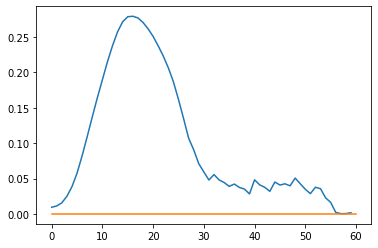

In [23]:
zz = preds_all.mean(0)[:,0]

train_md['prob'] = zz

plt.plot(train_md[['prob','pos_idx']].groupby('pos_idx').mean())
plt.plot([0,60],[0,0])

In [24]:
log_loss(train_md['any'],train_md['prob'])

0.09364259189035073

(0, 5)

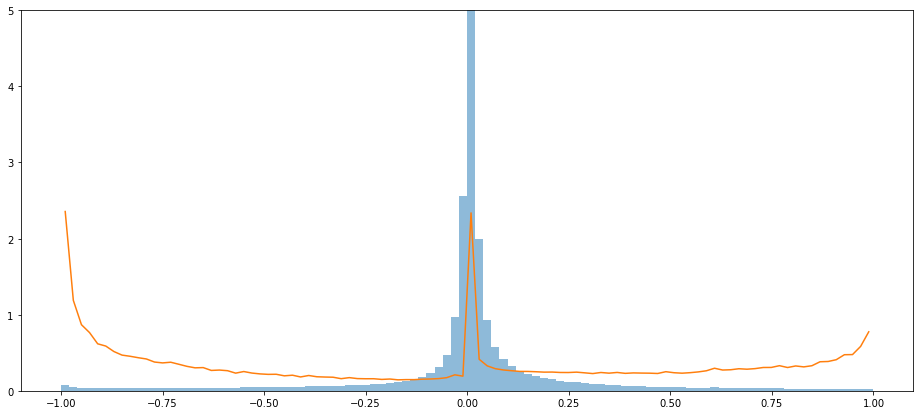

In [25]:
#zz = preds_all.mean(1)[0,:,0]
k=0
zz = preds_all.mean(0)[:,k]
#zz = preds_all[0,0,:,k]
#zz = scalePreds(zz,power=1.3)


plt.figure(figsize=(16, 7))
a = plt.hist(zz - train_md[all_ich[k]],bins=100,alpha=0.5,density=True)
b = 0.5*(a[1][1:] + a[1][:-1])
plt.plot(b,-7*np.log(1-abs(b))*a[0])
plt.ylim([0,5])

In [26]:
np.set_printoptions(precision=2)
zz = preds_all.mean(0)
for k in range(6):
    print(k,np.quantile(zz[:,k],[0.0001,0.001,0.01,0.5,0.99,0.999,0.9999]))

0 [6.82e-05 9.37e-05 1.38e-04 2.33e-03 9.95e-01 9.98e-01 9.99e-01]
1 [1.05e-05 1.69e-05 2.47e-05 1.52e-04 8.41e-02 4.81e-01 8.66e-01]
2 [2.72e-05 3.57e-05 4.91e-05 3.88e-04 9.84e-01 9.95e-01 9.97e-01]
3 [1.17e-05 1.61e-05 2.30e-05 1.33e-04 9.78e-01 9.93e-01 9.95e-01]
4 [3.26e-05 4.78e-05 7.00e-05 5.94e-04 9.53e-01 9.90e-01 9.94e-01]
5 [3.52e-05 5.65e-05 8.61e-05 1.18e-03 9.65e-01 9.90e-01 9.94e-01]


## Bounding

In [27]:
preds_all.shape

(11, 674252, 6)

In [28]:
loss = ((- train_md[all_ich].values * np.log(preds_all.mean(0)) \
        - (1 - train_md[all_ich].values) * np.log(1 - preds_all.mean(0)))*class_weights).mean()
print(loss)

0.05773064359137825


In [29]:
preds_all = predBounding(preds_all, target=train_md[all_ich].values)

initial score 0.05773064359137825
any too low inconsistencies
1 class: 0.003309795690092671
2 class: 0.02431030642441213
3 class: 0.012578113497354375
4 class: 0.029370459277971602
5 class: 0.08611778816983992
total 0.13624296392015287
any too low corrected score 0.05773548569069656
any too high inconsistencies
total 0.27330663528553933
any too high corrected score 0.057712699828333096


In [30]:
loss = ((- train_md[all_ich].values * np.log(preds_all.mean(0)) \
        - (1 - train_md[all_ich].values) * np.log(1 - preds_all.mean(0)))*class_weights).mean()
print(loss)

0.057712699828333096


## Models behavior per groups

In [31]:
np.set_printoptions(precision=4)
for col in ['PxlMin_zero']:
    for i in train_md[col].unique():
        res = ((- train_md[all_ich].values * np.log(preds_all) - (1 - train_md[all_ich].values) \
                * np.log(1 - preds_all)) * class_weights)[:,(train_md[col] == i)].mean((1,2))
        sz = (train_md[col] == i).sum()
        sz_test = (test_md[col] == i).sum()
        print('{:2d}: {:6d} {:6d} {}'.format(i,sz,sz_test,res))

 0: 447063   5033 [0.0759 0.0747 0.0735 0.0734 0.0735 0.0742 0.0731 0.073  0.072  0.0717
 0.0717]
 1: 227189  73512 [0.0369 0.0361 0.0354 0.035  0.0354 0.037  0.0361 0.0362 0.0354 0.035
 0.035 ]


# Inference

In [61]:
stg = time.time()

for ds in (my_datasets3 + my_datasets5[:-1]):
#for ds in [13]:
    folds = getNFolds(ds)
    preds = []
    for fold in range(folds):
        preds2 = []
        for anum in range(32):
            predictions = inference_one(fold = fold, anum = anum, bs=bs, dataset=ds)
            preds2.append(predictions)
        preds.append(np.stack(preds2))
    preds = np.stack(preds)
    print('total time', time.time() - stg)
    
    pickle.dump(preds, open(PATH_DISK/'preds_d{}_v{}'.format(ds, VERSION),'wb'))

completed epochs: 13
loading model model.b13.f0.d7.v31
adding dummy serieses 26
DataSet 7 test size 2240 fold 0
dataset test: 2240 loader test: 70
setFeats, augmentation -1
B10 -> time passed: 1.121 time per batch: 0.112
B20 -> time passed: 1.690 time per batch: 0.085
B30 -> time passed: 2.234 time per batch: 0.074
B40 -> time passed: 2.852 time per batch: 0.071
B50 -> time passed: 3.819 time per batch: 0.076
B60 -> time passed: 4.325 time per batch: 0.072
B70 -> time passed: 4.639 time per batch: 0.066
test processing time: 24.122931003570557
completed epochs: 13
loading model model.b13.f0.d7.v31
adding dummy serieses 26
DataSet 7 test size 2240 fold 0
dataset test: 2240 loader test: 70
setFeats, augmentation -1
B10 -> time passed: 1.035 time per batch: 0.103
B20 -> time passed: 1.581 time per batch: 0.079
B30 -> time passed: 2.132 time per batch: 0.071
B40 -> time passed: 2.681 time per batch: 0.067
B50 -> time passed: 3.481 time per batch: 0.070
B60 -> time passed: 4.136 time per ba

adding dummy serieses 26
DataSet 7 test size 2240 fold 0
dataset test: 2240 loader test: 70
setFeats, augmentation -1
B10 -> time passed: 1.063 time per batch: 0.106
B20 -> time passed: 1.608 time per batch: 0.080
B30 -> time passed: 2.152 time per batch: 0.072
B40 -> time passed: 2.734 time per batch: 0.068
B50 -> time passed: 3.599 time per batch: 0.072
B60 -> time passed: 4.186 time per batch: 0.070
B70 -> time passed: 4.619 time per batch: 0.066
test processing time: 11.030303716659546
completed epochs: 13
loading model model.b13.f0.d7.v31
adding dummy serieses 26
DataSet 7 test size 2240 fold 0
dataset test: 2240 loader test: 70
setFeats, augmentation -1
B10 -> time passed: 1.099 time per batch: 0.110
B20 -> time passed: 1.674 time per batch: 0.084
B30 -> time passed: 2.249 time per batch: 0.075
B40 -> time passed: 2.753 time per batch: 0.069
B50 -> time passed: 3.655 time per batch: 0.073
B60 -> time passed: 4.215 time per batch: 0.070
B70 -> time passed: 4.573 time per batch: 0.

adding dummy serieses 26
DataSet 7 test size 2240 fold 0
dataset test: 2240 loader test: 70
setFeats, augmentation -1
B10 -> time passed: 1.079 time per batch: 0.108
B20 -> time passed: 1.650 time per batch: 0.083
B30 -> time passed: 2.204 time per batch: 0.073
B40 -> time passed: 2.827 time per batch: 0.071
B50 -> time passed: 3.683 time per batch: 0.074
B60 -> time passed: 4.300 time per batch: 0.072
B70 -> time passed: 4.639 time per batch: 0.066
test processing time: 11.067747116088867
completed epochs: 13
loading model model.b13.f0.d7.v31
adding dummy serieses 26
DataSet 7 test size 2240 fold 0
dataset test: 2240 loader test: 70
setFeats, augmentation -1
B10 -> time passed: 1.100 time per batch: 0.110
B20 -> time passed: 1.696 time per batch: 0.085
B30 -> time passed: 2.276 time per batch: 0.076
B40 -> time passed: 2.869 time per batch: 0.072
B50 -> time passed: 3.855 time per batch: 0.077
B60 -> time passed: 4.373 time per batch: 0.073
B70 -> time passed: 4.701 time per batch: 0.

adding dummy serieses 26
DataSet 7 test size 2240 fold 1
dataset test: 2240 loader test: 70
setFeats, augmentation -1
B10 -> time passed: 1.098 time per batch: 0.110
B20 -> time passed: 1.666 time per batch: 0.083
B30 -> time passed: 2.253 time per batch: 0.075
B40 -> time passed: 2.855 time per batch: 0.071
B50 -> time passed: 3.844 time per batch: 0.077
B60 -> time passed: 4.375 time per batch: 0.073
B70 -> time passed: 4.725 time per batch: 0.067
test processing time: 11.218811511993408
completed epochs: 13
loading model model.b13.f1.d7.v31
adding dummy serieses 26
DataSet 7 test size 2240 fold 1
dataset test: 2240 loader test: 70
setFeats, augmentation -1
B10 -> time passed: 1.101 time per batch: 0.110
B20 -> time passed: 1.669 time per batch: 0.083
B30 -> time passed: 2.195 time per batch: 0.073
B40 -> time passed: 2.806 time per batch: 0.070
B50 -> time passed: 3.794 time per batch: 0.076
B60 -> time passed: 4.318 time per batch: 0.072
B70 -> time passed: 4.642 time per batch: 0.

adding dummy serieses 26
DataSet 7 test size 2240 fold 1
dataset test: 2240 loader test: 70
setFeats, augmentation -1
B10 -> time passed: 1.141 time per batch: 0.114
B20 -> time passed: 1.756 time per batch: 0.088
B30 -> time passed: 2.346 time per batch: 0.078
B40 -> time passed: 2.926 time per batch: 0.073
B50 -> time passed: 3.908 time per batch: 0.078
B60 -> time passed: 4.372 time per batch: 0.073
B70 -> time passed: 4.702 time per batch: 0.067
test processing time: 11.233582496643066
completed epochs: 13
loading model model.b13.f1.d7.v31
adding dummy serieses 26
DataSet 7 test size 2240 fold 1
dataset test: 2240 loader test: 70
setFeats, augmentation -1
B10 -> time passed: 1.105 time per batch: 0.111
B20 -> time passed: 1.729 time per batch: 0.086
B30 -> time passed: 2.361 time per batch: 0.079
B40 -> time passed: 2.957 time per batch: 0.074
B50 -> time passed: 3.966 time per batch: 0.079
B60 -> time passed: 4.443 time per batch: 0.074
B70 -> time passed: 4.772 time per batch: 0.

adding dummy serieses 26
DataSet 7 test size 2240 fold 2
dataset test: 2240 loader test: 70
setFeats, augmentation -1
B10 -> time passed: 1.100 time per batch: 0.110
B20 -> time passed: 1.654 time per batch: 0.083
B30 -> time passed: 2.200 time per batch: 0.073
B40 -> time passed: 2.782 time per batch: 0.070
B50 -> time passed: 3.664 time per batch: 0.073
B60 -> time passed: 4.249 time per batch: 0.071
B70 -> time passed: 4.593 time per batch: 0.066
test processing time: 11.098056316375732
completed epochs: 15
loading model model.b15.f2.d7.v31
adding dummy serieses 26
DataSet 7 test size 2240 fold 2
dataset test: 2240 loader test: 70
setFeats, augmentation -1
B10 -> time passed: 1.093 time per batch: 0.109
B20 -> time passed: 1.666 time per batch: 0.083
B30 -> time passed: 2.233 time per batch: 0.074
B40 -> time passed: 2.802 time per batch: 0.070
B50 -> time passed: 3.682 time per batch: 0.074
B60 -> time passed: 4.281 time per batch: 0.071
B70 -> time passed: 4.682 time per batch: 0.

loading model model.b15.f2.d7.v31
adding dummy serieses 26
DataSet 7 test size 2240 fold 2
dataset test: 2240 loader test: 70
setFeats, augmentation -1
B10 -> time passed: 1.049 time per batch: 0.105
B20 -> time passed: 1.609 time per batch: 0.080
B30 -> time passed: 2.187 time per batch: 0.073
B40 -> time passed: 2.747 time per batch: 0.069
B50 -> time passed: 3.594 time per batch: 0.072
B60 -> time passed: 4.253 time per batch: 0.071
B70 -> time passed: 4.616 time per batch: 0.066
test processing time: 11.298086881637573
completed epochs: 15
loading model model.b15.f2.d7.v31
adding dummy serieses 26
DataSet 7 test size 2240 fold 2
dataset test: 2240 loader test: 70
setFeats, augmentation -1
B10 -> time passed: 1.070 time per batch: 0.107
B20 -> time passed: 1.709 time per batch: 0.085
B30 -> time passed: 2.292 time per batch: 0.076
B40 -> time passed: 2.884 time per batch: 0.072
B50 -> time passed: 3.857 time per batch: 0.077
B60 -> time passed: 4.341 time per batch: 0.072
B70 -> tim

adding dummy serieses 26
DataSet 9 test size 2240 fold 0
dataset test: 2240 loader test: 70
setFeats, augmentation -1
B10 -> time passed: 1.094 time per batch: 0.109
B20 -> time passed: 1.629 time per batch: 0.081
B30 -> time passed: 2.174 time per batch: 0.072
B40 -> time passed: 2.746 time per batch: 0.069
B50 -> time passed: 3.749 time per batch: 0.075
B60 -> time passed: 4.221 time per batch: 0.070
B70 -> time passed: 4.550 time per batch: 0.065
test processing time: 8.086976051330566
completed epochs: 13
loading model model.b13.f0.d9.v31
adding dummy serieses 26
DataSet 9 test size 2240 fold 0
dataset test: 2240 loader test: 70
setFeats, augmentation -1
B10 -> time passed: 1.050 time per batch: 0.105
B20 -> time passed: 1.577 time per batch: 0.079
B30 -> time passed: 2.087 time per batch: 0.070
B40 -> time passed: 2.680 time per batch: 0.067
B50 -> time passed: 3.537 time per batch: 0.071
B60 -> time passed: 4.171 time per batch: 0.070
B70 -> time passed: 4.501 time per batch: 0.0

adding dummy serieses 26
DataSet 9 test size 2240 fold 0
dataset test: 2240 loader test: 70
setFeats, augmentation -1
B10 -> time passed: 1.042 time per batch: 0.104
B20 -> time passed: 1.566 time per batch: 0.078
B30 -> time passed: 2.130 time per batch: 0.071
B40 -> time passed: 2.657 time per batch: 0.066
B50 -> time passed: 3.611 time per batch: 0.072
B60 -> time passed: 4.146 time per batch: 0.069
B70 -> time passed: 4.468 time per batch: 0.064
test processing time: 8.052162408828735
completed epochs: 13
loading model model.b13.f0.d9.v31
adding dummy serieses 26
DataSet 9 test size 2240 fold 0
dataset test: 2240 loader test: 70
setFeats, augmentation -1
B10 -> time passed: 1.086 time per batch: 0.109
B20 -> time passed: 1.621 time per batch: 0.081
B30 -> time passed: 2.162 time per batch: 0.072
B40 -> time passed: 2.698 time per batch: 0.067
B50 -> time passed: 3.604 time per batch: 0.072
B60 -> time passed: 4.154 time per batch: 0.069
B70 -> time passed: 4.501 time per batch: 0.0

adding dummy serieses 26
DataSet 9 test size 2240 fold 1
dataset test: 2240 loader test: 70
setFeats, augmentation -1
B10 -> time passed: 1.034 time per batch: 0.103
B20 -> time passed: 1.582 time per batch: 0.079
B30 -> time passed: 2.158 time per batch: 0.072
B40 -> time passed: 2.696 time per batch: 0.067
B50 -> time passed: 3.497 time per batch: 0.070
B60 -> time passed: 4.170 time per batch: 0.069
B70 -> time passed: 4.486 time per batch: 0.064
test processing time: 8.01236081123352
completed epochs: 13
loading model model.b13.f1.d9.v31
adding dummy serieses 26
DataSet 9 test size 2240 fold 1
dataset test: 2240 loader test: 70
setFeats, augmentation -1
B10 -> time passed: 1.027 time per batch: 0.103
B20 -> time passed: 1.583 time per batch: 0.079
B30 -> time passed: 2.083 time per batch: 0.069
B40 -> time passed: 2.645 time per batch: 0.066
B50 -> time passed: 3.508 time per batch: 0.070
B60 -> time passed: 4.132 time per batch: 0.069
B70 -> time passed: 4.449 time per batch: 0.06

adding dummy serieses 26
DataSet 9 test size 2240 fold 1
dataset test: 2240 loader test: 70
setFeats, augmentation -1
B10 -> time passed: 1.043 time per batch: 0.104
B20 -> time passed: 1.566 time per batch: 0.078
B30 -> time passed: 2.125 time per batch: 0.071
B40 -> time passed: 2.658 time per batch: 0.066
B50 -> time passed: 3.571 time per batch: 0.071
B60 -> time passed: 4.082 time per batch: 0.068
B70 -> time passed: 4.470 time per batch: 0.064
test processing time: 8.040982007980347
completed epochs: 13
loading model model.b13.f1.d9.v31
adding dummy serieses 26
DataSet 9 test size 2240 fold 1
dataset test: 2240 loader test: 70
setFeats, augmentation -1
B10 -> time passed: 1.075 time per batch: 0.108
B20 -> time passed: 1.637 time per batch: 0.082
B30 -> time passed: 2.203 time per batch: 0.073
B40 -> time passed: 2.738 time per batch: 0.068
B50 -> time passed: 3.687 time per batch: 0.074
B60 -> time passed: 4.206 time per batch: 0.070
B70 -> time passed: 4.530 time per batch: 0.0

adding dummy serieses 26
DataSet 9 test size 2240 fold 2
dataset test: 2240 loader test: 70
setFeats, augmentation -1
B10 -> time passed: 1.030 time per batch: 0.103
B20 -> time passed: 1.586 time per batch: 0.079
B30 -> time passed: 2.145 time per batch: 0.071
B40 -> time passed: 2.697 time per batch: 0.067
B50 -> time passed: 3.556 time per batch: 0.071
B60 -> time passed: 4.178 time per batch: 0.070
B70 -> time passed: 4.508 time per batch: 0.064
test processing time: 8.105786561965942
completed epochs: 13
loading model model.b13.f2.d9.v31
adding dummy serieses 26
DataSet 9 test size 2240 fold 2
dataset test: 2240 loader test: 70
setFeats, augmentation -1
B10 -> time passed: 1.080 time per batch: 0.108
B20 -> time passed: 1.609 time per batch: 0.080
B30 -> time passed: 2.161 time per batch: 0.072
B40 -> time passed: 2.750 time per batch: 0.069
B50 -> time passed: 3.757 time per batch: 0.075
B60 -> time passed: 4.273 time per batch: 0.071
B70 -> time passed: 4.591 time per batch: 0.0

adding dummy serieses 26
DataSet 9 test size 2240 fold 2
dataset test: 2240 loader test: 70
setFeats, augmentation -1
B10 -> time passed: 1.064 time per batch: 0.106
B20 -> time passed: 1.571 time per batch: 0.079
B30 -> time passed: 2.119 time per batch: 0.071
B40 -> time passed: 2.674 time per batch: 0.067
B50 -> time passed: 3.469 time per batch: 0.069
B60 -> time passed: 4.140 time per batch: 0.069
B70 -> time passed: 4.513 time per batch: 0.064
test processing time: 8.072738409042358
completed epochs: 13
loading model model.b13.f2.d9.v31
adding dummy serieses 26
DataSet 9 test size 2240 fold 2
dataset test: 2240 loader test: 70
setFeats, augmentation -1
B10 -> time passed: 1.045 time per batch: 0.105
B20 -> time passed: 1.593 time per batch: 0.080
B30 -> time passed: 2.154 time per batch: 0.072
B40 -> time passed: 2.666 time per batch: 0.067
B50 -> time passed: 3.654 time per batch: 0.073
B60 -> time passed: 4.230 time per batch: 0.070
B70 -> time passed: 4.577 time per batch: 0.0

adding dummy serieses 26
DataSet 10 test size 2240 fold 0
dataset test: 2240 loader test: 70
setFeats, augmentation -1
B10 -> time passed: 1.052 time per batch: 0.105
B20 -> time passed: 1.583 time per batch: 0.079
B30 -> time passed: 2.115 time per batch: 0.070
B40 -> time passed: 2.631 time per batch: 0.066
B50 -> time passed: 3.551 time per batch: 0.071
B60 -> time passed: 4.039 time per batch: 0.067
B70 -> time passed: 4.405 time per batch: 0.063
test processing time: 7.94098973274231
completed epochs: 13
loading model model.b13.f0.d10.v31
adding dummy serieses 26
DataSet 10 test size 2240 fold 0
dataset test: 2240 loader test: 70
setFeats, augmentation -1
B10 -> time passed: 1.014 time per batch: 0.101
B20 -> time passed: 1.539 time per batch: 0.077
B30 -> time passed: 2.108 time per batch: 0.070
B40 -> time passed: 2.639 time per batch: 0.066
B50 -> time passed: 3.579 time per batch: 0.072
B60 -> time passed: 4.085 time per batch: 0.068
B70 -> time passed: 4.481 time per batch: 0

adding dummy serieses 26
DataSet 10 test size 2240 fold 0
dataset test: 2240 loader test: 70
setFeats, augmentation -1
B10 -> time passed: 1.076 time per batch: 0.108
B20 -> time passed: 1.605 time per batch: 0.080
B30 -> time passed: 2.177 time per batch: 0.073
B40 -> time passed: 2.711 time per batch: 0.068
B50 -> time passed: 3.646 time per batch: 0.073
B60 -> time passed: 4.166 time per batch: 0.069
B70 -> time passed: 4.514 time per batch: 0.064
test processing time: 8.072030544281006
completed epochs: 13
loading model model.b13.f0.d10.v31
adding dummy serieses 26
DataSet 10 test size 2240 fold 0
dataset test: 2240 loader test: 70
setFeats, augmentation -1
B10 -> time passed: 1.067 time per batch: 0.107
B20 -> time passed: 1.594 time per batch: 0.080
B30 -> time passed: 2.110 time per batch: 0.070
B40 -> time passed: 2.647 time per batch: 0.066
B50 -> time passed: 3.497 time per batch: 0.070
B60 -> time passed: 4.119 time per batch: 0.069
B70 -> time passed: 4.483 time per batch: 

adding dummy serieses 26
DataSet 10 test size 2240 fold 1
dataset test: 2240 loader test: 70
setFeats, augmentation -1
B10 -> time passed: 1.020 time per batch: 0.102
B20 -> time passed: 1.600 time per batch: 0.080
B30 -> time passed: 2.186 time per batch: 0.073
B40 -> time passed: 2.710 time per batch: 0.068
B50 -> time passed: 3.698 time per batch: 0.074
B60 -> time passed: 4.235 time per batch: 0.071
B70 -> time passed: 4.551 time per batch: 0.065
test processing time: 8.06450891494751
completed epochs: 13
loading model model.b13.f1.d10.v31
adding dummy serieses 26
DataSet 10 test size 2240 fold 1
dataset test: 2240 loader test: 70
setFeats, augmentation -1
B10 -> time passed: 1.029 time per batch: 0.103
B20 -> time passed: 1.606 time per batch: 0.080
B30 -> time passed: 2.152 time per batch: 0.072
B40 -> time passed: 2.657 time per batch: 0.066
B50 -> time passed: 3.534 time per batch: 0.071
B60 -> time passed: 4.073 time per batch: 0.068
B70 -> time passed: 4.437 time per batch: 0

adding dummy serieses 26
DataSet 10 test size 2240 fold 1
dataset test: 2240 loader test: 70
setFeats, augmentation -1
B10 -> time passed: 1.064 time per batch: 0.106
B20 -> time passed: 1.588 time per batch: 0.079
B30 -> time passed: 2.132 time per batch: 0.071
B40 -> time passed: 2.667 time per batch: 0.067
B50 -> time passed: 3.533 time per batch: 0.071
B60 -> time passed: 4.179 time per batch: 0.070
B70 -> time passed: 4.496 time per batch: 0.064
test processing time: 8.0352463722229
completed epochs: 13
loading model model.b13.f1.d10.v31
adding dummy serieses 26
DataSet 10 test size 2240 fold 1
dataset test: 2240 loader test: 70
setFeats, augmentation -1
B10 -> time passed: 1.067 time per batch: 0.107
B20 -> time passed: 1.606 time per batch: 0.080
B30 -> time passed: 2.152 time per batch: 0.072
B40 -> time passed: 2.693 time per batch: 0.067
B50 -> time passed: 3.551 time per batch: 0.071
B60 -> time passed: 4.221 time per batch: 0.070
B70 -> time passed: 4.529 time per batch: 0.

adding dummy serieses 26
DataSet 10 test size 2240 fold 1
dataset test: 2240 loader test: 70
setFeats, augmentation -1
B10 -> time passed: 1.074 time per batch: 0.107
B20 -> time passed: 1.623 time per batch: 0.081
B30 -> time passed: 2.217 time per batch: 0.074
B40 -> time passed: 2.757 time per batch: 0.069
B50 -> time passed: 3.684 time per batch: 0.074
B60 -> time passed: 4.208 time per batch: 0.070
B70 -> time passed: 4.527 time per batch: 0.065
test processing time: 8.027873277664185
completed epochs: 13
loading model model.b13.f2.d10.v31
adding dummy serieses 26
DataSet 10 test size 2240 fold 2
dataset test: 2240 loader test: 70
setFeats, augmentation -1
B10 -> time passed: 1.048 time per batch: 0.105
B20 -> time passed: 1.559 time per batch: 0.078
B30 -> time passed: 2.186 time per batch: 0.073
B40 -> time passed: 2.812 time per batch: 0.070
B50 -> time passed: 3.648 time per batch: 0.073
B60 -> time passed: 4.209 time per batch: 0.070
B70 -> time passed: 4.618 time per batch: 

adding dummy serieses 26
DataSet 10 test size 2240 fold 2
dataset test: 2240 loader test: 70
setFeats, augmentation -1
B10 -> time passed: 1.184 time per batch: 0.118
B20 -> time passed: 1.688 time per batch: 0.084
B30 -> time passed: 2.219 time per batch: 0.074
B40 -> time passed: 2.777 time per batch: 0.069
B50 -> time passed: 3.768 time per batch: 0.075
B60 -> time passed: 4.270 time per batch: 0.071
B70 -> time passed: 4.585 time per batch: 0.066
test processing time: 8.0857994556427
completed epochs: 13
loading model model.b13.f2.d10.v31
adding dummy serieses 26
DataSet 10 test size 2240 fold 2
dataset test: 2240 loader test: 70
setFeats, augmentation -1
B10 -> time passed: 1.035 time per batch: 0.104
B20 -> time passed: 1.572 time per batch: 0.079
B30 -> time passed: 2.064 time per batch: 0.069
B40 -> time passed: 2.600 time per batch: 0.065
B50 -> time passed: 3.478 time per batch: 0.070
B60 -> time passed: 4.043 time per batch: 0.067
B70 -> time passed: 4.393 time per batch: 0.

adding dummy serieses 26
DataSet 10 test size 2240 fold 2
dataset test: 2240 loader test: 70
setFeats, augmentation -1
B10 -> time passed: 1.046 time per batch: 0.105
B20 -> time passed: 1.598 time per batch: 0.080
B30 -> time passed: 2.156 time per batch: 0.072
B40 -> time passed: 2.756 time per batch: 0.069
B50 -> time passed: 3.519 time per batch: 0.070
B60 -> time passed: 4.231 time per batch: 0.071
B70 -> time passed: 4.542 time per batch: 0.065
test processing time: 8.083296298980713
completed epochs: 13
loading model model.b13.f2.d10.v31
adding dummy serieses 26
DataSet 10 test size 2240 fold 2
dataset test: 2240 loader test: 70
setFeats, augmentation -1
B10 -> time passed: 1.042 time per batch: 0.104
B20 -> time passed: 1.592 time per batch: 0.080
B30 -> time passed: 2.123 time per batch: 0.071
B40 -> time passed: 2.670 time per batch: 0.067
B50 -> time passed: 3.631 time per batch: 0.073
B60 -> time passed: 4.217 time per batch: 0.070
B70 -> time passed: 4.557 time per batch: 

adding dummy serieses 26
DataSet 11 test size 2240 fold 0
dataset test: 2240 loader test: 70
setFeats, augmentation -1
B10 -> time passed: 1.015 time per batch: 0.101
B20 -> time passed: 1.567 time per batch: 0.078
B30 -> time passed: 2.102 time per batch: 0.070
B40 -> time passed: 2.662 time per batch: 0.067
B50 -> time passed: 3.522 time per batch: 0.070
B60 -> time passed: 4.169 time per batch: 0.069
B70 -> time passed: 4.492 time per batch: 0.064
test processing time: 8.023860454559326
completed epochs: 13
loading model model.b13.f0.d11.v31
adding dummy serieses 26
DataSet 11 test size 2240 fold 0
dataset test: 2240 loader test: 70
setFeats, augmentation -1
B10 -> time passed: 1.028 time per batch: 0.103
B20 -> time passed: 1.575 time per batch: 0.079
B30 -> time passed: 2.112 time per batch: 0.070
B40 -> time passed: 2.680 time per batch: 0.067
B50 -> time passed: 3.654 time per batch: 0.073
B60 -> time passed: 4.193 time per batch: 0.070
B70 -> time passed: 4.501 time per batch: 

adding dummy serieses 26
DataSet 11 test size 2240 fold 0
dataset test: 2240 loader test: 70
setFeats, augmentation -1
B10 -> time passed: 1.061 time per batch: 0.106
B20 -> time passed: 1.636 time per batch: 0.082
B30 -> time passed: 2.195 time per batch: 0.073
B40 -> time passed: 2.751 time per batch: 0.069
B50 -> time passed: 3.565 time per batch: 0.071
B60 -> time passed: 4.234 time per batch: 0.071
B70 -> time passed: 4.546 time per batch: 0.065
test processing time: 8.094035625457764
completed epochs: 13
loading model model.b13.f0.d11.v31
adding dummy serieses 26
DataSet 11 test size 2240 fold 0
dataset test: 2240 loader test: 70
setFeats, augmentation -1
B10 -> time passed: 1.050 time per batch: 0.105
B20 -> time passed: 1.571 time per batch: 0.079
B30 -> time passed: 2.114 time per batch: 0.070
B40 -> time passed: 2.684 time per batch: 0.067
B50 -> time passed: 3.656 time per batch: 0.073
B60 -> time passed: 4.180 time per batch: 0.070
B70 -> time passed: 4.498 time per batch: 

loading model model.b13.f1.d11.v31
adding dummy serieses 26
DataSet 11 test size 2240 fold 1
dataset test: 2240 loader test: 70
setFeats, augmentation -1
B10 -> time passed: 1.036 time per batch: 0.104
B20 -> time passed: 1.602 time per batch: 0.080
B30 -> time passed: 2.086 time per batch: 0.070
B40 -> time passed: 2.640 time per batch: 0.066
B50 -> time passed: 3.580 time per batch: 0.072
B60 -> time passed: 4.124 time per batch: 0.069
B70 -> time passed: 4.479 time per batch: 0.064
test processing time: 8.159012794494629
completed epochs: 13
loading model model.b13.f1.d11.v31
adding dummy serieses 26
DataSet 11 test size 2240 fold 1
dataset test: 2240 loader test: 70
setFeats, augmentation -1
B10 -> time passed: 1.032 time per batch: 0.103
B20 -> time passed: 1.584 time per batch: 0.079
B30 -> time passed: 2.164 time per batch: 0.072
B40 -> time passed: 2.730 time per batch: 0.068
B50 -> time passed: 3.424 time per batch: 0.068
B60 -> time passed: 4.223 time per batch: 0.070
B70 -> 

adding dummy serieses 26
DataSet 11 test size 2240 fold 1
dataset test: 2240 loader test: 70
setFeats, augmentation -1
B10 -> time passed: 1.028 time per batch: 0.103
B20 -> time passed: 1.585 time per batch: 0.079
B30 -> time passed: 2.130 time per batch: 0.071
B40 -> time passed: 2.649 time per batch: 0.066
B50 -> time passed: 3.540 time per batch: 0.071
B60 -> time passed: 4.107 time per batch: 0.068
B70 -> time passed: 4.459 time per batch: 0.064
test processing time: 8.04414677619934
completed epochs: 13
loading model model.b13.f1.d11.v31
adding dummy serieses 26
DataSet 11 test size 2240 fold 1
dataset test: 2240 loader test: 70
setFeats, augmentation -1
B10 -> time passed: 1.105 time per batch: 0.111
B20 -> time passed: 1.628 time per batch: 0.081
B30 -> time passed: 2.167 time per batch: 0.072
B40 -> time passed: 2.720 time per batch: 0.068
B50 -> time passed: 3.707 time per batch: 0.074
B60 -> time passed: 4.196 time per batch: 0.070
B70 -> time passed: 4.557 time per batch: 0

adding dummy serieses 26
DataSet 11 test size 2240 fold 2
dataset test: 2240 loader test: 70
setFeats, augmentation -1
B10 -> time passed: 1.024 time per batch: 0.102
B20 -> time passed: 1.582 time per batch: 0.079
B30 -> time passed: 2.097 time per batch: 0.070
B40 -> time passed: 2.617 time per batch: 0.065
B50 -> time passed: 3.467 time per batch: 0.069
B60 -> time passed: 4.035 time per batch: 0.067
B70 -> time passed: 4.411 time per batch: 0.063
test processing time: 8.006658792495728
completed epochs: 13
loading model model.b13.f2.d11.v31
adding dummy serieses 26
DataSet 11 test size 2240 fold 2
dataset test: 2240 loader test: 70
setFeats, augmentation -1
B10 -> time passed: 1.059 time per batch: 0.106
B20 -> time passed: 1.610 time per batch: 0.081
B30 -> time passed: 2.133 time per batch: 0.071
B40 -> time passed: 2.655 time per batch: 0.066
B50 -> time passed: 3.570 time per batch: 0.071
B60 -> time passed: 4.130 time per batch: 0.069
B70 -> time passed: 4.527 time per batch: 

adding dummy serieses 26
DataSet 11 test size 2240 fold 2
dataset test: 2240 loader test: 70
setFeats, augmentation -1
B10 -> time passed: 1.049 time per batch: 0.105
B20 -> time passed: 1.618 time per batch: 0.081
B30 -> time passed: 2.171 time per batch: 0.072
B40 -> time passed: 2.739 time per batch: 0.068
B50 -> time passed: 3.609 time per batch: 0.072
B60 -> time passed: 4.185 time per batch: 0.070
B70 -> time passed: 4.527 time per batch: 0.065
test processing time: 8.085890531539917
completed epochs: 13
loading model model.b13.f2.d11.v31
adding dummy serieses 26
DataSet 11 test size 2240 fold 2
dataset test: 2240 loader test: 70
setFeats, augmentation -1
B10 -> time passed: 1.064 time per batch: 0.106
B20 -> time passed: 1.582 time per batch: 0.079
B30 -> time passed: 2.141 time per batch: 0.071
B40 -> time passed: 2.674 time per batch: 0.067
B50 -> time passed: 3.569 time per batch: 0.071
B60 -> time passed: 4.120 time per batch: 0.069
B70 -> time passed: 4.486 time per batch: 

adding dummy serieses 26
DataSet 11 test size 2240 fold 3
dataset test: 2240 loader test: 70
setFeats, augmentation -1
B10 -> time passed: 1.047 time per batch: 0.105
B20 -> time passed: 1.587 time per batch: 0.079
B30 -> time passed: 2.138 time per batch: 0.071
B40 -> time passed: 2.700 time per batch: 0.068
B50 -> time passed: 3.704 time per batch: 0.074
B60 -> time passed: 4.201 time per batch: 0.070
B70 -> time passed: 4.514 time per batch: 0.064
test processing time: 8.186465978622437
completed epochs: 13
loading model model.b13.f3.d11.v31
adding dummy serieses 26
DataSet 11 test size 2240 fold 3
dataset test: 2240 loader test: 70
setFeats, augmentation -1
B10 -> time passed: 1.084 time per batch: 0.108
B20 -> time passed: 1.601 time per batch: 0.080
B30 -> time passed: 2.164 time per batch: 0.072
B40 -> time passed: 2.714 time per batch: 0.068
B50 -> time passed: 3.685 time per batch: 0.074
B60 -> time passed: 4.200 time per batch: 0.070
B70 -> time passed: 4.516 time per batch: 

adding dummy serieses 26
DataSet 11 test size 2240 fold 3
dataset test: 2240 loader test: 70
setFeats, augmentation -1
B10 -> time passed: 1.118 time per batch: 0.112
B20 -> time passed: 1.695 time per batch: 0.085
B30 -> time passed: 2.271 time per batch: 0.076
B40 -> time passed: 2.817 time per batch: 0.070
B50 -> time passed: 3.831 time per batch: 0.077
B60 -> time passed: 4.306 time per batch: 0.072
B70 -> time passed: 4.607 time per batch: 0.066
test processing time: 8.226243495941162
completed epochs: 13
loading model model.b13.f3.d11.v31
adding dummy serieses 26
DataSet 11 test size 2240 fold 3
dataset test: 2240 loader test: 70
setFeats, augmentation -1
B10 -> time passed: 1.086 time per batch: 0.109
B20 -> time passed: 1.621 time per batch: 0.081
B30 -> time passed: 2.139 time per batch: 0.071
B40 -> time passed: 2.661 time per batch: 0.067
B50 -> time passed: 3.554 time per batch: 0.071
B60 -> time passed: 4.148 time per batch: 0.069
B70 -> time passed: 4.496 time per batch: 

adding dummy serieses 26
DataSet 11 test size 2240 fold 4
dataset test: 2240 loader test: 70
setFeats, augmentation -1
B10 -> time passed: 1.051 time per batch: 0.105
B20 -> time passed: 1.602 time per batch: 0.080
B30 -> time passed: 2.125 time per batch: 0.071
B40 -> time passed: 2.646 time per batch: 0.066
B50 -> time passed: 3.456 time per batch: 0.069
B60 -> time passed: 4.117 time per batch: 0.069
B70 -> time passed: 4.454 time per batch: 0.064
test processing time: 8.031845331192017
completed epochs: 13
loading model model.b13.f4.d11.v31
adding dummy serieses 26
DataSet 11 test size 2240 fold 4
dataset test: 2240 loader test: 70
setFeats, augmentation -1
B10 -> time passed: 1.087 time per batch: 0.109
B20 -> time passed: 1.637 time per batch: 0.082
B30 -> time passed: 2.172 time per batch: 0.072
B40 -> time passed: 2.708 time per batch: 0.068
B50 -> time passed: 3.636 time per batch: 0.073
B60 -> time passed: 4.153 time per batch: 0.069
B70 -> time passed: 4.482 time per batch: 

adding dummy serieses 26
DataSet 11 test size 2240 fold 4
dataset test: 2240 loader test: 70
setFeats, augmentation -1
B10 -> time passed: 1.070 time per batch: 0.107
B20 -> time passed: 1.661 time per batch: 0.083
B30 -> time passed: 2.244 time per batch: 0.075
B40 -> time passed: 2.819 time per batch: 0.070
B50 -> time passed: 3.842 time per batch: 0.077
B60 -> time passed: 4.317 time per batch: 0.072
B70 -> time passed: 4.626 time per batch: 0.066
test processing time: 8.226861476898193
completed epochs: 13
loading model model.b13.f4.d11.v31
adding dummy serieses 26
DataSet 11 test size 2240 fold 4
dataset test: 2240 loader test: 70
setFeats, augmentation -1
B10 -> time passed: 1.029 time per batch: 0.103
B20 -> time passed: 1.589 time per batch: 0.079
B30 -> time passed: 2.159 time per batch: 0.072
B40 -> time passed: 2.768 time per batch: 0.069
B50 -> time passed: 3.749 time per batch: 0.075
B60 -> time passed: 4.246 time per batch: 0.071
B70 -> time passed: 4.556 time per batch: 

adding dummy serieses 26
DataSet 12 test size 2240 fold 0
dataset test: 2240 loader test: 70
setFeats, augmentation -1
B10 -> time passed: 1.090 time per batch: 0.109
B20 -> time passed: 1.636 time per batch: 0.082
B30 -> time passed: 2.163 time per batch: 0.072
B40 -> time passed: 2.702 time per batch: 0.068
B50 -> time passed: 3.658 time per batch: 0.073
B60 -> time passed: 4.136 time per batch: 0.069
B70 -> time passed: 4.462 time per batch: 0.064
test processing time: 8.025912284851074
completed epochs: 13
loading model model.b13.f0.d12.v31
adding dummy serieses 26
DataSet 12 test size 2240 fold 0
dataset test: 2240 loader test: 70
setFeats, augmentation -1
B10 -> time passed: 1.045 time per batch: 0.104
B20 -> time passed: 1.549 time per batch: 0.077
B30 -> time passed: 2.107 time per batch: 0.070
B40 -> time passed: 2.653 time per batch: 0.066
B50 -> time passed: 3.551 time per batch: 0.071
B60 -> time passed: 4.129 time per batch: 0.069
B70 -> time passed: 4.443 time per batch: 

adding dummy serieses 26
DataSet 12 test size 2240 fold 0
dataset test: 2240 loader test: 70
setFeats, augmentation -1
B10 -> time passed: 1.039 time per batch: 0.104
B20 -> time passed: 1.611 time per batch: 0.081
B30 -> time passed: 2.148 time per batch: 0.072
B40 -> time passed: 2.673 time per batch: 0.067
B50 -> time passed: 3.644 time per batch: 0.073
B60 -> time passed: 4.174 time per batch: 0.070
B70 -> time passed: 4.510 time per batch: 0.064
test processing time: 8.049164056777954
completed epochs: 13
loading model model.b13.f0.d12.v31
adding dummy serieses 26
DataSet 12 test size 2240 fold 0
dataset test: 2240 loader test: 70
setFeats, augmentation -1
B10 -> time passed: 1.068 time per batch: 0.107
B20 -> time passed: 1.667 time per batch: 0.083
B30 -> time passed: 2.251 time per batch: 0.075
B40 -> time passed: 2.781 time per batch: 0.070
B50 -> time passed: 3.741 time per batch: 0.075
B60 -> time passed: 4.237 time per batch: 0.071
B70 -> time passed: 4.546 time per batch: 

loading model model.b13.f1.d12.v31
adding dummy serieses 26
DataSet 12 test size 2240 fold 1
dataset test: 2240 loader test: 70
setFeats, augmentation -1
B10 -> time passed: 1.081 time per batch: 0.108
B20 -> time passed: 1.633 time per batch: 0.082
B30 -> time passed: 2.202 time per batch: 0.073
B40 -> time passed: 2.763 time per batch: 0.069
B50 -> time passed: 3.785 time per batch: 0.076
B60 -> time passed: 4.287 time per batch: 0.071
B70 -> time passed: 4.595 time per batch: 0.066
test processing time: 12.354968309402466
completed epochs: 13
loading model model.b13.f1.d12.v31
adding dummy serieses 26
DataSet 12 test size 2240 fold 1
dataset test: 2240 loader test: 70
setFeats, augmentation -1
B10 -> time passed: 1.065 time per batch: 0.106
B20 -> time passed: 1.607 time per batch: 0.080
B30 -> time passed: 2.199 time per batch: 0.073
B40 -> time passed: 2.766 time per batch: 0.069
B50 -> time passed: 3.741 time per batch: 0.075
B60 -> time passed: 4.246 time per batch: 0.071
B70 ->

adding dummy serieses 26
DataSet 12 test size 2240 fold 1
dataset test: 2240 loader test: 70
setFeats, augmentation -1
B10 -> time passed: 1.041 time per batch: 0.104
B20 -> time passed: 1.571 time per batch: 0.079
B30 -> time passed: 2.150 time per batch: 0.072
B40 -> time passed: 2.667 time per batch: 0.067
B50 -> time passed: 3.618 time per batch: 0.072
B60 -> time passed: 4.175 time per batch: 0.070
B70 -> time passed: 4.519 time per batch: 0.065
test processing time: 8.125352382659912
completed epochs: 13
loading model model.b13.f1.d12.v31
adding dummy serieses 26
DataSet 12 test size 2240 fold 1
dataset test: 2240 loader test: 70
setFeats, augmentation -1
B10 -> time passed: 1.059 time per batch: 0.106
B20 -> time passed: 1.635 time per batch: 0.082
B30 -> time passed: 2.221 time per batch: 0.074
B40 -> time passed: 2.765 time per batch: 0.069
B50 -> time passed: 3.534 time per batch: 0.071
B60 -> time passed: 4.172 time per batch: 0.070
B70 -> time passed: 4.499 time per batch: 

adding dummy serieses 26
DataSet 12 test size 2240 fold 1
dataset test: 2240 loader test: 70
setFeats, augmentation -1
B10 -> time passed: 1.045 time per batch: 0.105
B20 -> time passed: 1.565 time per batch: 0.078
B30 -> time passed: 2.099 time per batch: 0.070
B40 -> time passed: 2.610 time per batch: 0.065
B50 -> time passed: 3.543 time per batch: 0.071
B60 -> time passed: 4.073 time per batch: 0.068
B70 -> time passed: 4.462 time per batch: 0.064
test processing time: 8.087098598480225
completed epochs: 13
loading model model.b13.f1.d12.v31
adding dummy serieses 26
DataSet 12 test size 2240 fold 1
dataset test: 2240 loader test: 70
setFeats, augmentation -1
B10 -> time passed: 1.092 time per batch: 0.109
B20 -> time passed: 1.600 time per batch: 0.080
B30 -> time passed: 2.149 time per batch: 0.072
B40 -> time passed: 2.680 time per batch: 0.067
B50 -> time passed: 3.613 time per batch: 0.072
B60 -> time passed: 4.161 time per batch: 0.069
B70 -> time passed: 4.568 time per batch: 

adding dummy serieses 26
DataSet 12 test size 2240 fold 2
dataset test: 2240 loader test: 70
setFeats, augmentation -1
B10 -> time passed: 1.032 time per batch: 0.103
B20 -> time passed: 1.670 time per batch: 0.083
B30 -> time passed: 2.208 time per batch: 0.074
B40 -> time passed: 2.689 time per batch: 0.067
B50 -> time passed: 3.550 time per batch: 0.071
B60 -> time passed: 4.196 time per batch: 0.070
B70 -> time passed: 4.528 time per batch: 0.065
test processing time: 8.148324012756348
completed epochs: 13
loading model model.b13.f2.d12.v31
adding dummy serieses 26
DataSet 12 test size 2240 fold 2
dataset test: 2240 loader test: 70
setFeats, augmentation -1
B10 -> time passed: 1.060 time per batch: 0.106
B20 -> time passed: 1.587 time per batch: 0.079
B30 -> time passed: 2.123 time per batch: 0.071
B40 -> time passed: 2.635 time per batch: 0.066
B50 -> time passed: 3.585 time per batch: 0.072
B60 -> time passed: 4.141 time per batch: 0.069
B70 -> time passed: 4.485 time per batch: 

adding dummy serieses 26
DataSet 12 test size 2240 fold 2
dataset test: 2240 loader test: 70
setFeats, augmentation -1
B10 -> time passed: 1.111 time per batch: 0.111
B20 -> time passed: 1.670 time per batch: 0.083
B30 -> time passed: 2.297 time per batch: 0.077
B40 -> time passed: 2.876 time per batch: 0.072
B50 -> time passed: 3.888 time per batch: 0.078
B60 -> time passed: 4.383 time per batch: 0.073
B70 -> time passed: 4.703 time per batch: 0.067
test processing time: 8.312870979309082
completed epochs: 13
loading model model.b13.f2.d12.v31
adding dummy serieses 26
DataSet 12 test size 2240 fold 2
dataset test: 2240 loader test: 70
setFeats, augmentation -1
B10 -> time passed: 1.037 time per batch: 0.104
B20 -> time passed: 1.604 time per batch: 0.080
B30 -> time passed: 2.162 time per batch: 0.072
B40 -> time passed: 2.729 time per batch: 0.068
B50 -> time passed: 3.706 time per batch: 0.074
B60 -> time passed: 4.194 time per batch: 0.070
B70 -> time passed: 4.531 time per batch: 

adding dummy serieses 26
DataSet 12 test size 2240 fold 3
dataset test: 2240 loader test: 70
setFeats, augmentation -1
B10 -> time passed: 1.053 time per batch: 0.105
B20 -> time passed: 1.568 time per batch: 0.078
B30 -> time passed: 2.108 time per batch: 0.070
B40 -> time passed: 2.682 time per batch: 0.067
B50 -> time passed: 3.592 time per batch: 0.072
B60 -> time passed: 4.177 time per batch: 0.070
B70 -> time passed: 4.520 time per batch: 0.065
test processing time: 8.187689065933228
completed epochs: 13
loading model model.b13.f3.d12.v31
adding dummy serieses 26
DataSet 12 test size 2240 fold 3
dataset test: 2240 loader test: 70
setFeats, augmentation -1
B10 -> time passed: 1.048 time per batch: 0.105
B20 -> time passed: 1.617 time per batch: 0.081
B30 -> time passed: 2.172 time per batch: 0.072
B40 -> time passed: 2.711 time per batch: 0.068
B50 -> time passed: 3.559 time per batch: 0.071
B60 -> time passed: 4.233 time per batch: 0.071
B70 -> time passed: 4.554 time per batch: 

loading model model.b13.f3.d12.v31
adding dummy serieses 26
DataSet 12 test size 2240 fold 3
dataset test: 2240 loader test: 70
setFeats, augmentation -1
B10 -> time passed: 1.049 time per batch: 0.105
B20 -> time passed: 1.608 time per batch: 0.080
B30 -> time passed: 2.167 time per batch: 0.072
B40 -> time passed: 2.736 time per batch: 0.068
B50 -> time passed: 3.698 time per batch: 0.074
B60 -> time passed: 4.169 time per batch: 0.069
B70 -> time passed: 4.520 time per batch: 0.065
test processing time: 8.288218259811401
completed epochs: 13
loading model model.b13.f3.d12.v31
adding dummy serieses 26
DataSet 12 test size 2240 fold 3
dataset test: 2240 loader test: 70
setFeats, augmentation -1
B10 -> time passed: 1.021 time per batch: 0.102
B20 -> time passed: 1.587 time per batch: 0.079
B30 -> time passed: 2.106 time per batch: 0.070
B40 -> time passed: 2.645 time per batch: 0.066
B50 -> time passed: 3.520 time per batch: 0.070
B60 -> time passed: 4.152 time per batch: 0.069
B70 -> 

adding dummy serieses 26
DataSet 12 test size 2240 fold 4
dataset test: 2240 loader test: 70
setFeats, augmentation -1
B10 -> time passed: 1.060 time per batch: 0.106
B20 -> time passed: 1.646 time per batch: 0.082
B30 -> time passed: 2.209 time per batch: 0.074
B40 -> time passed: 2.777 time per batch: 0.069
B50 -> time passed: 3.713 time per batch: 0.074
B60 -> time passed: 4.236 time per batch: 0.071
B70 -> time passed: 4.583 time per batch: 0.065
test processing time: 8.200945615768433
completed epochs: 13
loading model model.b13.f4.d12.v31
adding dummy serieses 26
DataSet 12 test size 2240 fold 4
dataset test: 2240 loader test: 70
setFeats, augmentation -1
B10 -> time passed: 1.049 time per batch: 0.105
B20 -> time passed: 1.577 time per batch: 0.079
B30 -> time passed: 2.146 time per batch: 0.072
B40 -> time passed: 2.692 time per batch: 0.067
B50 -> time passed: 3.577 time per batch: 0.072
B60 -> time passed: 4.186 time per batch: 0.070
B70 -> time passed: 4.523 time per batch: 

adding dummy serieses 26
DataSet 12 test size 2240 fold 4
dataset test: 2240 loader test: 70
setFeats, augmentation -1
B10 -> time passed: 1.056 time per batch: 0.106
B20 -> time passed: 1.601 time per batch: 0.080
B30 -> time passed: 2.132 time per batch: 0.071
B40 -> time passed: 2.691 time per batch: 0.067
B50 -> time passed: 3.561 time per batch: 0.071
B60 -> time passed: 4.156 time per batch: 0.069
B70 -> time passed: 4.500 time per batch: 0.064
test processing time: 8.137053966522217
completed epochs: 13
loading model model.b13.f4.d12.v31
adding dummy serieses 26
DataSet 12 test size 2240 fold 4
dataset test: 2240 loader test: 70
setFeats, augmentation -1
B10 -> time passed: 1.037 time per batch: 0.104
B20 -> time passed: 1.584 time per batch: 0.079
B30 -> time passed: 2.113 time per batch: 0.070
B40 -> time passed: 2.675 time per batch: 0.067
B50 -> time passed: 3.470 time per batch: 0.069
B60 -> time passed: 4.175 time per batch: 0.070
B70 -> time passed: 4.550 time per batch: 

In [ ]:
#total time 1466.092379808426 5x8
#total time 5399.404406309128 5x32

# Files transfer

In [68]:
!gsutil cp /home/zahar_chikishev/running/oof* gs://rsna-hemorrhage/results

Copying file:///home/zahar_chikishev/running/oof_d6_f0_v20 [Content-Type=application/octet-stream]...
Copying file:///home/zahar_chikishev/running/oof_d6_f1_v20 [Content-Type=application/octet-stream]...
Copying file:///home/zahar_chikishev/running/oof_d6_f2_v20 [Content-Type=application/octet-stream]...
Copying file:///home/zahar_chikishev/running/oof_d7_f0_v20 [Content-Type=application/octet-stream]...
- [4 files][164.5 MiB/164.5 MiB]                                                
==> NOTE: You are performing a sequence of gsutil operations that may
run significantly faster if you instead use gsutil -m cp ... Please
see the -m section under "gsutil help options" for further information
about when gsutil -m can be advantageous.

Copying file:///home/zahar_chikishev/running/oof_d7_f1_v20 [Content-Type=application/octet-stream]...
Copying file:///home/zahar_chikishev/running/oof_d7_f2_v20 [Content-Type=application/octet-stream]...
Copying file:///home/zahar_chikishev/running/oof_d8_f0_

In [69]:
!gsutil cp /home/zahar_chikishev/running/preds* gs://rsna-hemorrhage/results

Copying file:///home/zahar_chikishev/running/preds_d6_v20 [Content-Type=application/octet-stream]...
Copying file:///home/zahar_chikishev/running/preds_d7_v20 [Content-Type=application/octet-stream]...
Copying file:///home/zahar_chikishev/running/preds_d8_v20 [Content-Type=application/octet-stream]...
Copying file:///home/zahar_chikishev/running/preds_d9_v20 [Content-Type=application/octet-stream]...
\ [4 files][172.6 MiB/172.6 MiB]                                                
Operation completed over 4 objects/172.6 MiB.                                    


In [ ]:
!gsutil -m cp gs://rsna-hemorrhage/results/* C:\StudioProjects\Hemorrhage\running\ensemble

In [ ]:
!gsutil -m cp gs://rsna-hemorrhage/yuvals/model_Densenet161_3_version_classifier_splits_fullhead_resmodel_type_OOF_pred_split_* .

In [ ]:
!gsutil -m cp gs://rsna-hemorrhage/yuvals/model_*_version_classifier_splits_fullhead_resmodel_type_OOF_pred_split_* .

In [ ]:
!gsutil -m cp gs://rsna-hemorrhage/yuvals/model_Densenet161_3_version_classifier_splits_fullhead_resmodel_type_test_pred_ensamble_split_* .

In [ ]:
!gsutil cp gs://rsna-hemorrhage/yuvals/OOF_validation_image_ids.pkl .
!gsutil cp gs://rsna-hemorrhage/yuvals/ensemble_test_image_ids.pkl .

In [19]:
!rm /home/zahar_chikishev/running/*v53

In [18]:
!ls /home/zahar_chikishev/running/*v53

/home/zahar_chikishev/running/preds_se_resnext101_32x4d_v53
/home/zahar_chikishev/running/stats.f0.v53
/home/zahar_chikishev/running/stats.f1.v53
/home/zahar_chikishev/running/stats.f2.v53


In [20]:
!ls /home/zahar_chikishev/running/oof*

/home/zahar_chikishev/running/oof_Densenet161_f0_v72
/home/zahar_chikishev/running/oof_Densenet161_f1_v72
/home/zahar_chikishev/running/oof_Densenet161_f2_v72
/home/zahar_chikishev/running/oof_Densenet169_f0_v73
/home/zahar_chikishev/running/oof_Densenet169_f1_v73
/home/zahar_chikishev/running/oof_Densenet169_f2_v73
/home/zahar_chikishev/running/oof_Densenet201_f0_v74
/home/zahar_chikishev/running/oof_Densenet201_f1_v74
/home/zahar_chikishev/running/oof_Densenet201_f2_v74
/home/zahar_chikishev/running/oof_se_resnext101_32x4d_f0_v75
/home/zahar_chikishev/running/oof_se_resnext101_32x4d_f1_v75
/home/zahar_chikishev/running/oof_se_resnext101_32x4d_f2_v75


In [21]:
!ls /home/zahar_chikishev/running/preds*

/home/zahar_chikishev/running/preds_Densenet161_v72
/home/zahar_chikishev/running/preds_Densenet169_v73
/home/zahar_chikishev/running/preds_Densenet201_v74
/home/zahar_chikishev/running/preds_se_resnext101_32x4d_v75


# Ensembling

In [32]:
preds_all.shape

(11, 674252, 6)

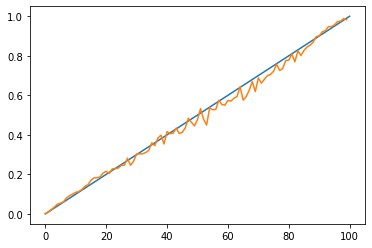

In [33]:
#dd = pd.DataFrame(preds_all.mean(1)[4], columns=all_ich)
dd = pd.DataFrame(preds_all.mean(0), columns=all_ich)

k=5
plt.plot([0,100],[0,1])
plt.plot(train_md[[all_ich[k]]].groupby(pd.cut(dd[all_ich[k]],np.arange(101)/100)).mean().values)

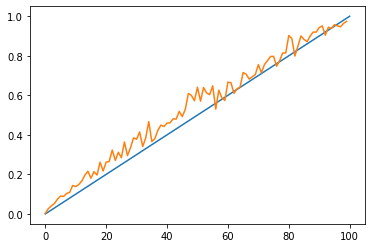

In [34]:
k = 0
dd = pd.DataFrame((preds_all.mean(0)), columns=all_ich)
vals = (train_md[all_ich[k]]*train_md['weights']).groupby(pd.cut(dd[all_ich[k]],np.arange(101)/100)).mean()/ \
    train_md['weights'].groupby(pd.cut(dd[all_ich[k]],np.arange(101)/100)).mean()

#dd = pd.DataFrame(preds_all.mean(1)[4], columns=all_ich)

plt.plot([0,100],[0,1])
plt.plot(vals.values)

In [35]:
res = np.zeros(6)
for k in range(6):
    res[k] = log_loss(train_md[all_ich[k]], preds_all.mean(0)[:,k], eps=1e-7, labels=[0,1], \
                      sample_weight=train_md.weights)
print((res*class_weights).mean())

0.06189192456554918


In [36]:
res = np.zeros(6)
for k in range(6):
    res[k] = log_loss(train_md[all_ich[k]], preds_all.mean(0)[:,k]**(0.9), eps=1e-7, labels=[0,1], \
                      sample_weight=train_md.weights)
print((res*class_weights).mean())

0.061696925652571566


In [71]:
%run ./Code.ipynb

In [37]:
stats_fn = PATH_DISK/'ensemble'/'stats.v{}'.format(VERSION)
if stats_fn.is_file():
    stats_fn.unlink()

In [38]:
stg = time.time()
for fold in range(3):
    for target in range(6):
        train_ensemble(train_md, preds_all, fold=fold, target=target, weighted=False)
print('total running time', time.time() - stg)

starting fold 0 target 0
my_len 5
obj  0.09310979823902363
obj  0.09309891297963857
obj  0.09309804988952196
obj  0.0930981000547037
obj  0.09309896379867619
obj  0.09309872791033867
obj  0.09309696636415186
obj  0.09310577281194969
obj  0.09315037307263183
obj  0.0930754032738943
obj  0.09299959267759171
obj  0.09299006453707237
obj  0.09298865419788256
obj  0.09298861236894457
obj  0.09298861192091962
obj  0.0929886119204644
model [0.3048 0.693 ] sum 0.9978355576458361
my_len 5
v32 f0 t0: original ll 0.0946/0.1037, ensemble ll 0.0946/0.1043
running time 2.5843257904052734
starting fold 0 target 1
my_len 5
obj  0.013707903774352548
obj  0.013668306947138213
obj  0.013677671110083705
obj  0.013659076558040151
obj  0.013670961821047382
obj  0.013698009152625017
obj  0.013678181334109692
obj  0.013682868193264454
obj  0.0136436242062214
obj  0.013599800703361883
obj  0.013586728264973041
obj  0.013575470573655912
obj  0.013575170196754483
obj  0.013575116496065997
model [0.2103 0.7697] s

obj  0.040724245382170204
obj  0.040721724340392014
obj  0.04071861357402181
obj  0.04073193634381185
obj  0.04068815321030965
obj  0.0406511290739963
obj  0.040625923027345315
obj  0.04062486152506819
obj  0.04062479493700466
obj  0.04062479394796013
obj  0.040624793944704626
model [0.2579 0.7402] sum 0.9980649334901206
my_len 5
v32 f2 t2: original ll 0.0369/0.0378, ensemble ll 0.0368/0.0380
running time 2.4411075115203857
starting fold 2 target 3
my_len 5
obj  0.023785044573934266
obj  0.023783039084060997
obj  0.023783027452748174
obj  0.023783063841764044
obj  0.023783854860683934
obj  0.02379595479826475
obj  0.023805931565758526
obj  0.023830015043026006
obj  0.023807662408119597
obj  0.02382203389104899
obj  0.02376871082921037
obj  0.02375784249410138
obj  0.023755468661933593
obj  0.02375487401079495
obj  0.02375471727663255
obj  0.023754664906031037
obj  0.02375464914808342
obj  0.02375464616742852
model [0.3229 0.6771] sum 0.9999990602882886
my_len 5
v32 f2 t3: original ll 0

In [39]:
stg = time.time()
for fold in range(3):
    for target in range(6):
        train_ensemble(train_md, preds_all, fold=fold, target=target, weighted=True)
print('total running time', time.time() - stg)

starting fold 0 target 0
my_len 5
obj  0.10623079061074929
obj  0.10586767371088006
obj  0.10567491655098825
obj  0.10564047980321707
obj  0.1056357694160092
obj  0.10561815833278833
obj  0.10559301852051227
obj  0.1053099705107514
obj  0.10533083028599578
obj  0.1049363153254414
obj  0.1046753527884991
obj  0.10461016818667597
obj  0.10458909578655277
obj  0.10458441695970001
obj  0.10458401374183512
model [9.8578e-01 5.6525e-05] sum 0.9858332541464571
my_len 5
v32 f0 t0: original ll 0.0946/0.1037, ensemble ll 0.0961/0.1034
running time 2.4515163898468018
starting fold 0 target 1
my_len 5
obj  0.022095325566145053
obj  0.022081099296854003
obj  0.022084310912762594
obj  0.022099838404709367
obj  0.02210122231437875
obj  0.022089585513337118
obj  0.02208947306099798
obj  0.022089405998358378
obj  0.02206165062779823
obj  0.022031082806638676
obj  0.02202234730677134
obj  0.022016683408695694
obj  0.02201667494892182
obj  0.022016650587716104
model [0.2649 0.7351] sum 0.9999980392770401

obj  0.04080544347044437
obj  0.04080540732240596
obj  0.04080540727651027
model [0.5152 0.4783] sum 0.9934818769276961
my_len 5
v32 f2 t2: original ll 0.0369/0.0378, ensemble ll 0.0370/0.0377
running time 2.2740840911865234
starting fold 2 target 3
my_len 5
obj  0.021117265699021226
obj  0.021093780851587418
obj  0.021091268304375483
obj  0.021094589799897027
obj  0.02111561027961064
obj  0.02109258524476713
obj  0.021091120175820863
obj  0.021091170436482135
obj  0.0210909616474937
obj  0.021090798116994873
obj  0.02108891773791736
obj  0.021088905176044014
obj  0.0210889051703836
model [0.5521 0.4401] sum 0.9921723496156221
my_len 5
v32 f2 t3: original ll 0.0234/0.0178, ensemble ll 0.0235/0.0178
running time 2.2556989192962646
starting fold 2 target 4
my_len 5
obj  0.06109408607974129
obj  0.06109113806400788
obj  0.061091099946829173
obj  0.06109219143595478
obj  0.06110095186270682
obj  0.06109319928789752
obj  0.06109717557903191
obj  0.061099363135236055
obj  0.06109643829761528

In [40]:
stats = pd.read_csv(PATH_DISK/'ensemble'/'stats.v{}'.format(VERSION))
stats.groupby(['weighted','target'])[['valid_loss','valid_loss_ens','valid_w_loss','valid_w_loss_ens']].mean()

valid_loss  valid_loss_ens  valid_w_loss  valid_w_loss_ens
weighted target                                                            
False    0         0.093610        0.093540      0.105384          0.106104
         1         0.014161        0.014042      0.020850          0.020771
         2         0.039449        0.039363      0.039833          0.040004
         3         0.023672        0.023630      0.020019          0.020086
         4         0.062581        0.062462      0.061597          0.061922
         5         0.077168        0.077033      0.079752          0.080238
True     0         0.093610        0.094939      0.105384          0.104300
         1         0.014161        0.014045      0.020850          0.020759
         2         0.039449        0.039565      0.039833          0.039851
         3         0.023672        0.023733      0.020019          0.020043
         4         0.062581        0.062692      0.061597          0.061628
         5         0.077168        0.077557      0.079752          0.079717

In [41]:
# wegihted models
tt = pd.concat([
stats.loc[stats.weighted == False].groupby('target')[['valid_loss','valid_w_loss',
                                                      'valid_loss_ens','valid_w_loss_ens']].mean()\
    .apply(lambda x: x*class_weights).mean(),
stats.loc[stats.weighted == True].groupby('target')[['valid_loss','valid_w_loss',
                                                     'valid_loss_ens','valid_w_loss_ens']].mean()\
    .apply(lambda x: x*class_weights).mean()
],axis=1)
tt.columns = ['not weighted','weighted']
tt

,not weighted,weighted
valid_loss,0.057750,0.057750
valid_w_loss,0.061831,0.061831
valid_loss_ens,0.057658,0.058210
valid_w_loss_ens,0.062176,0.061514


In [51]:
# non-weighted models
tt = pd.concat([
stats.loc[stats.weighted == False].groupby('target')[['valid_loss','valid_w_loss',
                                                      'valid_loss_ens','valid_w_loss_ens']].mean()\
    .apply(lambda x: x*class_weights).mean(),
stats.loc[stats.weighted == True].groupby('target')[['valid_loss','valid_w_loss',
                                                     'valid_loss_ens','valid_w_loss_ens']].mean()\
    .apply(lambda x: x*class_weights).mean()
],axis=1)
tt.columns = ['not weighted','weighted']
tt

,not weighted,weighted
valid_loss,0.057661,0.057661
valid_w_loss,0.062715,0.062715
valid_loss_ens,0.057638,0.057799
valid_w_loss_ens,0.062705,0.062648


In [40]:
# wegihted models OLD
tt = pd.concat([
stats.loc[stats.weighted == False].groupby('target')[['valid_loss','valid_w_loss',
                                                      'valid_loss_ens','valid_w_loss_ens']].mean()\
    .apply(lambda x: x*class_weights).mean(),
stats.loc[stats.weighted == True].groupby('target')[['valid_loss','valid_w_loss',
                                                     'valid_loss_ens','valid_w_loss_ens']].mean()\
    .apply(lambda x: x*class_weights).mean()
],axis=1)
tt.columns = ['not weighted','weighted']
tt

,not weighted,weighted
valid_loss,0.057773,0.057773
valid_w_loss,0.061811,0.061811
valid_loss_ens,0.057676,0.058197
valid_w_loss_ens,0.062118,0.061454


In [42]:
np.set_printoptions(precision=4)
res2_all = []
for target in range(6):
    res2 = np.zeros((3, 2))
    for fold in range(3):
        model = pickle.load(open(PATH_DISK/'ensemble'/'model.f{}.t{}.v{}'
                                 .format(fold,target,VERSION),'rb'))
        res2[fold] = model.x
        #print(fold,target,model.x)
    print(target, res2.mean(0), res2.mean(0).sum())
    res2_all.append(res2)
print('total', np.stack(res2_all).mean((0,1)), np.stack(res2_all).mean((0,1)).sum())

0 [0.9876 0.0018] 0.9894477407141307
1 [0.1925 0.8075] 0.9999976546133494
2 [0.527 0.462] 0.988990555803149
3 [0.4246 0.5643] 0.9888406843499173
4 [0.5151 0.4738] 0.9889344892215379
5 [0.7454 0.2461] 0.9914763656881276
total [0.5654 0.4259] 0.9912812483983686


In [43]:
preds3 = np.stack([pickle.load(open(PATH_DISK/'preds_d{}_v{}'.format(ds, VERSION),'rb')) for ds in my_datasets3])
preds5 = np.stack([pickle.load(open(PATH_DISK/'preds_d{}_v{}'.format(ds, VERSION),'rb')) for ds in my_datasets5])

In [63]:
preds = np.concatenate([preds3.mean((1,2)), preds5.mean((1,2))],axis=0)

In [45]:
yuval_test = pickle.load(open(PATH_DISK/'ensemble/ensemble_test_image_ids.pkl','rb'))
assert len(yuval_test) == len(test_md)

df = pd.DataFrame(np.arange(len(yuval_test)), columns=['yuval_idx'])
df.index = yuval_test
test_md = test_md.join(df, on = 'img_id')

In [55]:
names_y3 = [
    #'model_Densenet201_3_version_classifier_splits_fullhead_resmodel_type_test_pred_ensamble_split_{}.pkl',
    #'model_Densenet161_3_version_classifier_splits_fullhead_resmodel_pool2_3_type_test_pred_ensamble_split_{}.pkl',
    'model_Densenet169_3_version_classifier_splits_fullhead_resmodel_pool2_3_type_test_pred_ensamble_split_{}.pkl',
    'model_se_resnext101_32x4d_version_classifier_splits_fullhead_resmodel_pool2_3_type_test_pred_ensamble_split_{}.pkl',
    'model_se_resnet101_version_classifier_splits_fullhead_resmodel_pool2_3_type_test_pred_ensamble_split_{}.pkl',
           ]

In [56]:
names_y5 = [
    'model_se_resnext101_32x4d_version_new_splits_fullhead_resmodel_pool2_3_type_test_pred_ensamble_split_{}.pkl',
    'model_se_resnet101_version_new_splits_fullhead_resmodel_pool2_3_type_test_pred_ensamble_split_{}.pkl',
    'model_se_resnet101_version_new_splits_focal_fullhead_resmodel_pool2_over3_type_test_pred_ensamble_split_{}.pkl',
           ]

In [57]:
preds_y3 = np.stack([torch.sigmoid(torch.stack([torch.stack(pickle.load(
    open(PATH_DISK/'yuval/OOF'/name.format(fold),'rb'))) for fold in range(3)])).numpy() for name in names_y3])

In [58]:
preds_y5 = np.stack([torch.sigmoid(torch.stack([torch.stack(pickle.load(
    open(PATH_DISK/'yuval/OOF'/name.format(fold),'rb'))) for fold in range(5)])).numpy() for name in names_y5])

In [64]:
preds_y = np.concatenate([preds_y3.mean((1,2)), preds_y5.mean((1,2))],axis=0)

In [65]:
preds_y = preds_y[:,test_md.yuval_idx]
preds_y = preds_y[:,:,np.array([5,0,1,2,3,4])]

In [66]:
preds = np.concatenate([preds, preds_y], axis=0)

In [68]:
preds = preds[ds_mask]

In [69]:
preds.shape

(11, 78545, 6)

In [70]:
preds = predBounding(preds)

any too low inconsistencies
1 class: 0.00043171546131632704
2 class: 0.013115816642457421
3 class: 0.008188704795745346
4 class: 0.015698007511617543
5 class: 0.04870514296957737
total 0.08165440772226691
any too high inconsistencies
total 0.23122587514974044


In [105]:
#predictions = preds.mean((0,1))

In [71]:
stg = time.time()

test_preds_trgt = []
print('version', VERSION, 'my_len', my_len)
for target in range(6):
    
    test_preds_fold = []
    for fold in range(3):
        X = np.stack([preds[:my_len,:,target].mean(0), 
                      preds[my_len:,:,target].mean(0)], axis=0)
        
        model = pickle.load(open(PATH_DISK/'ensemble'/'model.f{}.t{}.v{}'.format(fold,target,VERSION),'rb'))
        test_preds_fold.append((X*np.expand_dims(model.x, axis=1)).sum(0))
    
    test_preds_trgt.append(np.stack(test_preds_fold).mean(0))

predictions = np.stack(test_preds_trgt,axis=1)

print('total running time', time.time() - stg)

version 32 my_len 5
total running time 0.0522921085357666


In [72]:
np.corrcoef(preds[:,:,0])

array([[1.    , 0.992 , 0.9932, 0.993 , 0.9929, 0.9927, 0.9892, 0.9906,
        0.9916, 0.9915, 0.9913],
       [0.992 , 1.    , 0.9968, 0.995 , 0.9951, 0.9903, 0.9959, 0.9924,
        0.9949, 0.9931, 0.9932],
       [0.9932, 0.9968, 1.    , 0.9967, 0.9966, 0.9915, 0.9932, 0.9929,
        0.9968, 0.9941, 0.9939],
       [0.993 , 0.995 , 0.9967, 1.    , 0.9986, 0.9909, 0.9909, 0.9936,
        0.9936, 0.996 , 0.9954],
       [0.9929, 0.9951, 0.9966, 0.9986, 1.    , 0.9908, 0.9911, 0.9938,
        0.9937, 0.9955, 0.9963],
       [0.9927, 0.9903, 0.9915, 0.9909, 0.9908, 1.    , 0.9915, 0.9923,
        0.9936, 0.9937, 0.9935],
       [0.9892, 0.9959, 0.9932, 0.9909, 0.9911, 0.9915, 1.    , 0.9947,
        0.9969, 0.9949, 0.9948],
       [0.9906, 0.9924, 0.9929, 0.9936, 0.9938, 0.9923, 0.9947, 1.    ,
        0.9959, 0.997 , 0.9969],
       [0.9916, 0.9949, 0.9968, 0.9936, 0.9937, 0.9936, 0.9969, 0.9959,
        1.    , 0.9968, 0.9965],
       [0.9915, 0.9931, 0.9941, 0.996 , 0.9955, 0.9937,

In [73]:
predictions.shape

(78545, 6)

# Submitting

In [74]:
id_column = np.array([a + '_' + b for a in test_md.SOPInstanceUID for b in all_ich])
sub = pd.DataFrame({'ID': id_column, 'Label': predictions.reshape(-1)})
sub.to_csv(PATH/'sub.csv', index=False)

## Sanity checks

In [75]:
test_md['pred_any'] = predictions[:,0]

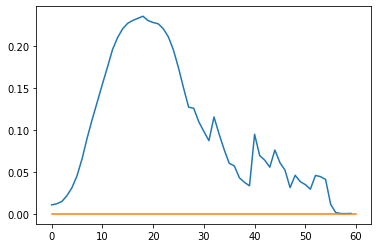

In [76]:
plt.plot(test_md[['pos_idx','pred_any']].groupby('pos_idx').mean())
plt.plot([0,60],[0,0])

In [77]:
# weighted models + weighted ensembling
#0 [2.14e-04 2.50e-04 3.15e-04 2.15e-03 9.88e-01 9.93e-01 9.94e-01]
#1 [4.46e-06 5.32e-06 6.88e-06 8.58e-05 1.34e-01 6.16e-01 9.24e-01]
#2 [4.88e-05 5.54e-05 6.88e-05 3.27e-04 9.65e-01 9.86e-01 9.90e-01]
#3 [1.78e-05 2.00e-05 2.42e-05 1.04e-04 9.52e-01 9.77e-01 9.81e-01]
#4 [6.56e-05 7.67e-05 9.50e-05 4.71e-04 9.41e-01 9.85e-01 9.89e-01]
#5 [9.93e-05 1.21e-04 1.53e-04 9.91e-04 9.42e-01 9.86e-01 9.92e-01]

# weighted models + non-weighted ensembling
#0 [9.25e-05 1.11e-04 1.41e-04 1.60e-03 9.93e-01 9.97e-01 9.99e-01]
#1 [8.16e-06 9.69e-06 1.24e-05 9.28e-05 1.31e-01 5.91e-01 8.94e-01]
#2 [2.38e-05 2.66e-05 3.46e-05 2.46e-04 9.73e-01 9.91e-01 9.94e-01]
#3 [1.25e-05 1.40e-05 1.71e-05 8.06e-05 9.66e-01 9.90e-01 9.94e-01]
#4 [3.27e-05 3.80e-05 4.71e-05 3.55e-04 9.51e-01 9.91e-01 9.94e-01]
#5 [4.51e-05 5.74e-05 7.40e-05 7.90e-04 9.46e-01 9.89e-01 9.94e-01]

# non-weighted models + non-weighted ensembling
#0 [1.10e-04 1.24e-04 1.55e-04 1.27e-03 9.93e-01 9.97e-01 9.98e-01]
#1 [8.61e-06 9.98e-06 1.23e-05 8.77e-05 1.36e-01 5.73e-01 8.74e-01]
#2 [2.34e-05 2.66e-05 3.41e-05 2.12e-04 9.73e-01 9.91e-01 9.95e-01]
#3 [1.08e-05 1.25e-05 1.50e-05 6.10e-05 9.67e-01 9.92e-01 9.96e-01]
#4 [3.18e-05 3.68e-05 4.48e-05 3.03e-04 9.51e-01 9.91e-01 9.94e-01]
#5 [4.72e-05 5.48e-05 6.86e-05 6.83e-04 9.41e-01 9.88e-01 9.92e-01]

np.set_printoptions(precision=2)
for k in range(6):
    print(k,np.quantile(predictions[:,k],[0.0001,0.001,0.01,0.5,0.99,0.999,0.9999]))

0 [2.24e-04 2.57e-04 3.13e-04 2.20e-03 9.82e-01 9.87e-01 9.88e-01]
1 [1.19e-05 1.38e-05 1.69e-05 1.03e-04 1.41e-01 5.94e-01 8.96e-01]
2 [5.03e-05 5.60e-05 7.01e-05 3.34e-04 9.59e-01 9.80e-01 9.84e-01]
3 [2.07e-05 2.35e-05 2.80e-05 1.09e-04 9.53e-01 9.80e-01 9.83e-01]
4 [7.11e-05 8.17e-05 9.83e-05 4.79e-04 9.33e-01 9.76e-01 9.81e-01]
5 [1.12e-04 1.33e-04 1.67e-04 1.03e-03 9.32e-01 9.77e-01 9.84e-01]


In [78]:
# weighted models + weighted ensembling
#array([0.1361, 0.0056, 0.0429, 0.0295, 0.0468, 0.0569])

# weighted models + non-weighted ensembling
#array([0.1335, 0.0055, 0.0423, 0.0298, 0.0466, 0.0556])

# non-weighted models + non-weighted ensembling
#array([0.1313, 0.0057, 0.0421, 0.0297, 0.0464, 0.0544])

np.set_printoptions(precision=4)
predictions.mean(0)

array([0.1357, 0.0059, 0.0428, 0.0296, 0.0466, 0.0568])

In [79]:
sub.loc[range(0,len(sub),6), 'Label'].mean()

0.1357189110611546

In [93]:
sub.loc[range(0,len(sub),6), 'Label'].mean()

0.13418304425483424

In [80]:
sub = sub.sort_values('ID').reset_index(drop=True)
best_sub = pd.read_csv(PATH/'submission56.csv').sort_values('ID').reset_index(drop=True)

In [90]:
best_sub.loc[range(0,len(sub),6), 'Label'].mean()

0.1332598999809263

In [81]:
sp.stats.spearmanr(sub.loc[range(0,len(sub),6), 'Label'], 
                   best_sub.loc[range(0,len(sub),6), 'Label'])

SpearmanrResult(correlation=0.984279901141253, pvalue=0.0)

In [124]:
sp.stats.spearmanr(sub.loc[range(0,len(sub),6), 'Label'], 
                   best_sub.loc[range(0,len(sub),6), 'Label'])

SpearmanrResult(correlation=0.985530472858697, pvalue=0.0)

In [82]:
np.corrcoef(sub.sort_values('ID').reset_index(drop=True).loc[range(0,len(sub),6), 'Label'], 
            best_sub.sort_values('ID').reset_index(drop=True).loc[range(0,len(sub),6), 'Label'])[0,1]

0.9985362623461371

In [126]:
np.corrcoef(sub.sort_values('ID').reset_index(drop=True).loc[range(0,len(sub),6), 'Label'], 
            best_sub.sort_values('ID').reset_index(drop=True).loc[range(0,len(sub),6), 'Label'])[0,1]

0.9986350935991319

## Submission

In [83]:
!~/.local/bin/kaggle competitions submit rsna-intracranial-hemorrhage-detection -f ~/sub.csv -m "GCP, my weighted + yuval, 32TTA, weighted ensembling"

100%|██████████████████████████████████████| 20.8M/20.8M [00:03<00:00, 6.00MB/s]
Successfully submitted to RSNA Intracranial Hemorrhage Detection

In [ ]:
!kaggle competitions submit rsna-intracranial-hemorrhage-detection -f C:/StudioProjects/Hemorrhage/sub.csv -m "GCP, d161+d169+d201+s101+yd161, 8TTA, ensemble, bounds"